## Dimensionality Reduction
### Feature Selection

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [31]:
data = pd.read_csv('wine.csv',header=0)
X = data.iloc[:,1:]
y = data.iloc[:,0]

X.isnull().sum() #X is the dataset(Pandas dataframe).

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [26]:
X.var() #identifying column variances

Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

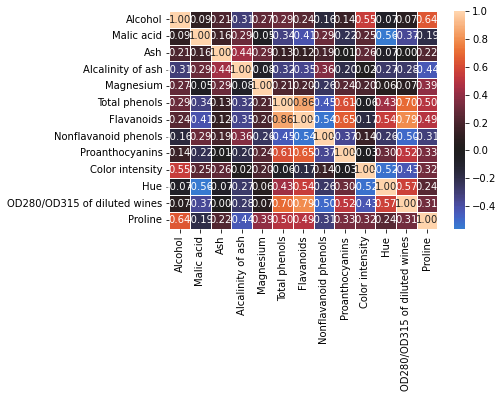

In [15]:
corr = X.corr() #calculating pairwise correlation
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [25]:
rf = RandomForestClassifier(n_estimators = 30)
rf.fit(X.values,y.values)
f_i = rf.feature_importances_
columns = X.columns
for i in range(len(f_i)):
    print(columns[i] + ' : {:.2f}'.format(f_i[i]))

Alcohol : 0.14
Malic acid : 0.03
Ash : 0.01
Alcalinity of ash : 0.01
Magnesium : 0.02
Total phenols : 0.03
Flavanoids : 0.19
Nonflavanoid phenols : 0.01
Proanthocyanins : 0.02
Color intensity : 0.20
Hue : 0.07
OD280/OD315 of diluted wines : 0.10
Proline : 0.17


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,stratify = y, test_size = 0.2)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=30), n_features_to_select=6, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)
print('----------------------------------------')
# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))
print('---------------Support------------------')
# Print the features that are not eliminated
print(X.columns[rfe.support_])
print('---------------Accuracy-----------------')
# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

print('---------------Features-----------------')
f_i = rfe.estimator_.feature_importances_
columns = X.columns
for i in range(len(f_i)):
    print(columns[i] + ' : {:.2f}'.format(f_i[i]))

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
----------------------------------------
{'Alcohol': 1, 'Malic acid': 5, 'Ash': 6, 'Alcalinity of ash': 7, 'Magnesium': 3, 'Total phenols': 2, 'Flavanoids': 1, 'Nonflavanoid phenols': 8, 'Proanthocyanins': 4, 'Color intensity': 1, 'Hue': 1, 'OD280/OD315 of diluted wines': 1, 'Proline': 1}
---------------Support------------------
Index(['Alcohol', 'Flavanoids', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
---------------Accuracy-----------------
100.0% accuracy on test set.
---------------Features-----------------
Alcohol : 0.10
Malic acid : 0.23
Ash : 0.17
Alcalinity of ash : 0.09
Magnesium : 0.18
Total phenols : 0.23
